In [2]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
#import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
#from keras.wrappers.scikit_learn import KerasClassifier

In [4]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [5]:
fashion_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train.shape,fashion_test.shape

((60000, 785), (10000, 785))

In [7]:
X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

In [8]:
X_train_fashion.shape, X_test_fashion.shape

((60000, 784), (10000, 784))

In [9]:
y_train_fashion

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

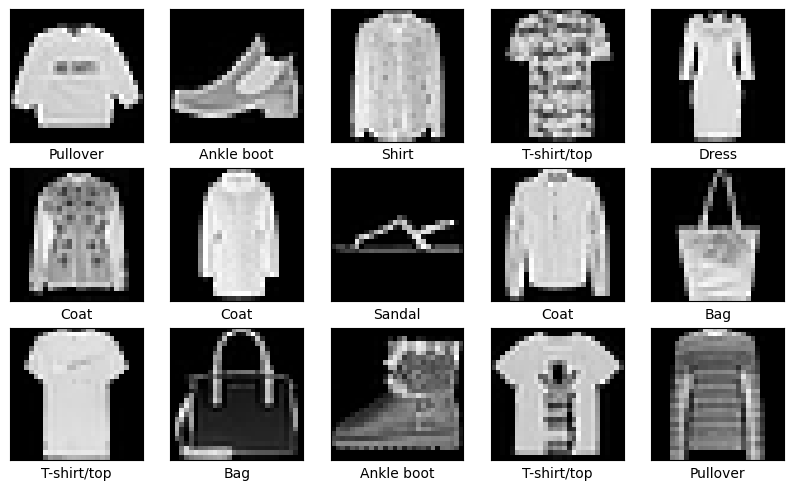

In [10]:
#Reshaping the dataset
x_train_reshape = X_train_fashion.values.reshape(60000,28,28)
x_test_reshape = X_test_fashion.values.reshape(10000,28,28)

#Names of clothing accessories in order 
#col_names = ['Pullover','Ankle boot','Shirt','T-shirt/top','Trouser',,'Dress','Coat','Sandal','Coat','Sneaker','Bag',]
col_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#col_names = ['Pullover','Ankle boot','Shirt','T-shirt/top','Dress','Coat','Coat','Sandal','Coat','Bag','T-shirt/top','Bag','Ankle boot','T-shirt/top','Pullover']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [11]:
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [12]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

#Fitting the model
history=model.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=15,validation_data=(X_test_fashion, y_test_fashion))

Epoch 1/15
600/600 [==============================] - 11s 12ms/step - loss: 1.0777 - accuracy: 0.6321 - val_loss: 0.5723 - val_accuracy: 0.8018
Epoch 2/15
600/600 [==============================] - 9s 14ms/step - loss: 0.7381 - accuracy: 0.7484 - val_loss: 0.4741 - val_accuracy: 0.8431
Epoch 3/15
600/600 [==============================] - 9s 16ms/step - loss: 0.6604 - accuracy: 0.7763 - val_loss: 0.4520 - val_accuracy: 0.8430
Epoch 4/15
600/600 [==============================] - 9s 15ms/step - loss: 0.6310 - accuracy: 0.7877 - val_loss: 0.4498 - val_accuracy: 0.8548
Epoch 5/15
600/600 [==============================] - 9s 15ms/step - loss: 0.6088 - accuracy: 0.7976 - val_loss: 0.4218 - val_accuracy: 0.8603
Epoch 6/15
600/600 [==============================] - 9s 16ms/step - loss: 0.5933 - accuracy: 0.8028 - val_loss: 0.4155 - val_accuracy: 0.8540
Epoch 7/15
600/600 [==============================] - 9s 15ms/step - loss: 0.5759 - accuracy: 0.8069 - val_loss: 0.4198 - val_accuracy: 0.860

In [13]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 [==============================] - 2s 5ms/step - loss: 0.3789 - accuracy: 0.8716


In [14]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,2))

Fashion MNIST Test accuracy: 0.87


In [15]:
#Predicting the labels-Fashion
y_predict_fash = model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)

313/313 [==============================] - 2s 6ms/step


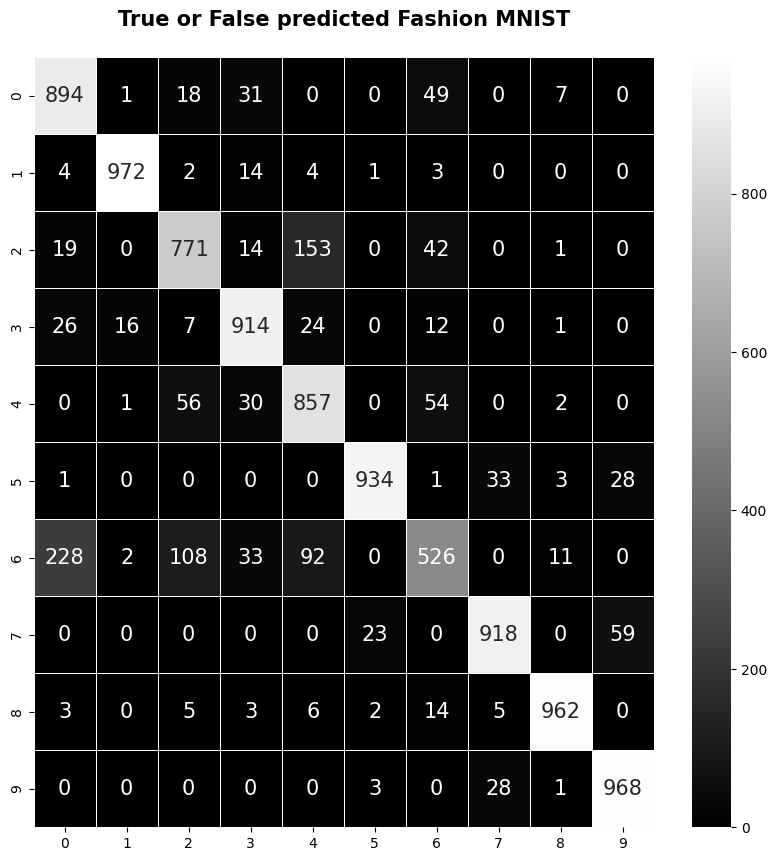

In [16]:
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
#plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.80      0.77      0.78      1000
           3       0.88      0.91      0.90      1000
           4       0.75      0.86      0.80      1000
           5       0.97      0.93      0.95      1000
           6       0.75      0.53      0.62      1000
           7       0.93      0.92      0.93      1000
           8       0.97      0.96      0.97      1000
           9       0.92      0.97      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [18]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


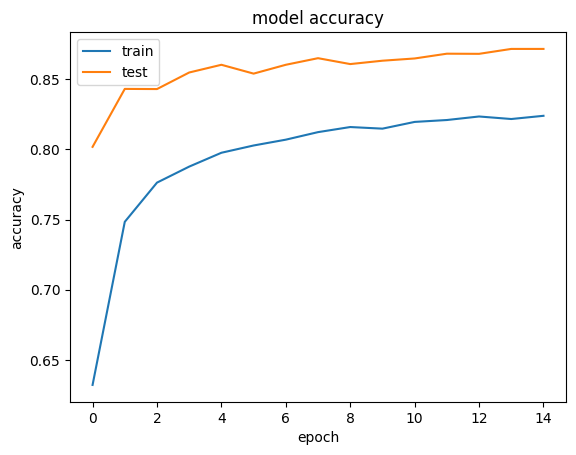

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

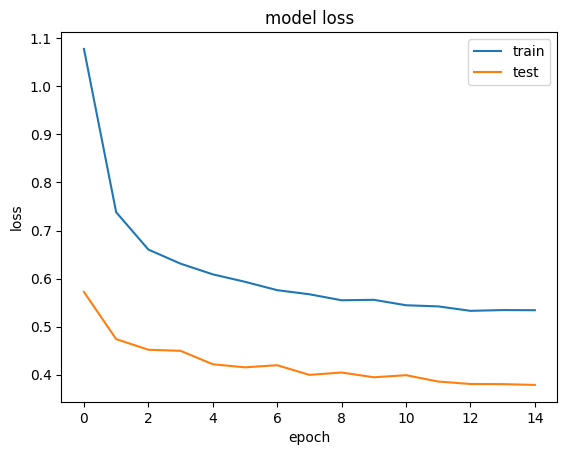

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [21]:
#tf.expand_dims(X_test_digit[0])
y_predict = model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_fashion, axis=1)

1/1 [==============================] - 0s 48ms/step


In [22]:
y_predict = model.predict(X_test_fashion)
y_predict[0]

313/313 [==============================] - 1s 4ms/step


array([6.7856103e-01, 2.0036583e-03, 1.2747289e-02, 2.4120782e-02,
       8.6991832e-04, 3.9326723e-04, 2.7989855e-01, 1.0613502e-04,
       1.1702146e-03, 1.2924992e-04], dtype=float32)

In [23]:
y_predict1 = np.argmax(y_predict,axis=1)
y_predict1

array([0, 1, 2, ..., 8, 8, 2], dtype=int64)

In [24]:
y_test_digit_eval=np.argmax(y_test_fashion, axis=1)
y_test_digit_eval

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

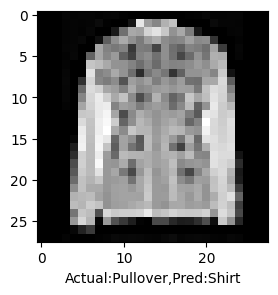

In [30]:
#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(3,3))

plt.imshow(x_train_reshape[5], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[(y_test_digit_eval[5])],col_names[(y_predict1[5])]))
plt.show()                                  

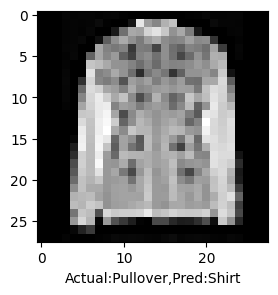

In [28]:
#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(3,3))

plt.imshow(x_train_reshape[5], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[(y_test_digit_eval[5])],col_names[(y_predict1[5])]))
                                     
plt.show() 

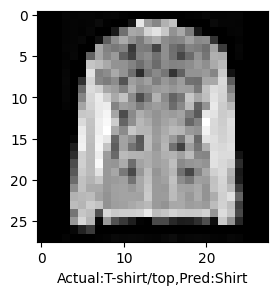

In [31]:
#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(3,3))

plt.imshow(x_train_reshape[5], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit_eval[5])],col_names[(y_predict1[5])]))
                                     
plt.show() 